<img src="https://github.com/aminizahra/ML_AI2YOU/blob/main/AI2YOU.png?raw=true" alt="AI2YOU" width="300" height="300">
<h1 align="center"><font size = 14>Hands-On Machine Learning</font></h1>
<br>
<h2 align="center"><font size = 5>Data Cleaning</font></h2>
<h3 align="center">Zahra Amini</h3>
<br>
<br>
<br>
<br>
<br>

# **Data Cleaning**

# What is data cleaning?

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct. There is no one absolute way to prescribe the exact steps in the data cleaning process because the processes will vary from dataset to dataset. But it is crucial to establish a template for your data cleaning process so you know you are doing it the right way every time.

# 0. Start

## 📤 Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# import fuzzywuzzy
# from fuzzywuzzy import process

# 💾 Read Data

In [2]:
df = pd.read_csv("COVID-19.csv")

# 🔎 Check the basic information of the dataset

In [3]:
df.head()

,Country,date,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,Canada,3/2/07,M,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,2
1,USA,3/22/07,M,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,2
2,Austria,4/6/07,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,2
3,Pakistan,4/14/07,M,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,2
4,germany,4/15/07,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [4]:
df['TARGET'].unique()

array([2, 1, 0], dtype=int64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     295 non-null    object 
 1   date        295 non-null    object 
 2   SESSO       295 non-null    object 
 3   AGE         295 non-null    int64  
 4   WBC         293 non-null    float64
 5   Piastrine   293 non-null    float64
 6   Neutrofili  222 non-null    float64
 7   Linfociti   222 non-null    object 
 8   Monociti    222 non-null    float64
 9   Eosinofili  222 non-null    float64
 10  Basofili    220 non-null    float64
 11  PCR         286 non-null    float64
 12  AST         292 non-null    float64
 13  ALT         279 non-null    float64
 14  ALP         139 non-null    float64
 15  GGT         144 non-null    float64
 16  LDH         205 non-null    float64
 17  TARGET      295 non-null    int64  
dtypes: float64(12), int64(2), object(4)
memory usage: 41.6+ KB


In [6]:
df.shape

(295, 18)

# 1. Inconsistent Data Entry

### Convert to float

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     295 non-null    object 
 1   date        295 non-null    object 
 2   SESSO       295 non-null    object 
 3   AGE         295 non-null    int64  
 4   WBC         293 non-null    float64
 5   Piastrine   293 non-null    float64
 6   Neutrofili  222 non-null    float64
 7   Linfociti   222 non-null    object 
 8   Monociti    222 non-null    float64
 9   Eosinofili  222 non-null    float64
 10  Basofili    220 non-null    float64
 11  PCR         286 non-null    float64
 12  AST         292 non-null    float64
 13  ALT         279 non-null    float64
 14  ALP         139 non-null    float64
 15  GGT         144 non-null    float64
 16  LDH         205 non-null    float64
 17  TARGET      295 non-null    int64  
dtypes: float64(12), int64(2), object(4)
memory usage: 41.6+ KB


In [8]:
df['Linfociti']

0      0.8
1      0.9
2      NaN
3      1.2
4      NaN
      ... 
290    0.4
291    1.3
292    0.6
293    0.8
294    0.6
Name: Linfociti, Length: 295, dtype: object

In [9]:
# df["Linfociti"].astype(float)

In [10]:
indx = df[df['Linfociti']=='0-4'].index

In [11]:
df["Linfociti"][indx]= 0.4

C:\Users\amini\AppData\Local\Temp\ipykernel_18188\3815495428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Linfociti"][indx]= 0.4


In [12]:
df["Linfociti"] = df["Linfociti"].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     295 non-null    object 
 1   date        295 non-null    object 
 2   SESSO       295 non-null    object 
 3   AGE         295 non-null    int64  
 4   WBC         293 non-null    float64
 5   Piastrine   293 non-null    float64
 6   Neutrofili  222 non-null    float64
 7   Linfociti   222 non-null    float64
 8   Monociti    222 non-null    float64
 9   Eosinofili  222 non-null    float64
 10  Basofili    220 non-null    float64
 11  PCR         286 non-null    float64
 12  AST         292 non-null    float64
 13  ALT         279 non-null    float64
 14  ALP         139 non-null    float64
 15  GGT         144 non-null    float64
 16  LDH         205 non-null    float64
 17  TARGET      295 non-null    int64  
dtypes: float64(13), int64(2), object(3)
memory usage: 41.6+ KB


### isnull

In [14]:
df.isnull().sum()

Country         0
date            0
SESSO           0
AGE             0
WBC             2
Piastrine       2
Neutrofili     73
Linfociti      73
Monociti       73
Eosinofili     73
Basofili       75
PCR             9
AST             3
ALT            16
ALP           156
GGT           151
LDH            90
TARGET          0
dtype: int64

# 2. Handling Duplicates

In [15]:
df.duplicated().sum()

16

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
# df.drop_duplicates(subset='ID', inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 278
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     279 non-null    object 
 1   date        279 non-null    object 
 2   SESSO       279 non-null    object 
 3   AGE         279 non-null    int64  
 4   WBC         277 non-null    float64
 5   Piastrine   277 non-null    float64
 6   Neutrofili  209 non-null    float64
 7   Linfociti   209 non-null    float64
 8   Monociti    209 non-null    float64
 9   Eosinofili  209 non-null    float64
 10  Basofili    208 non-null    float64
 11  PCR         273 non-null    float64
 12  AST         277 non-null    float64
 13  ALT         266 non-null    float64
 14  ALP         131 non-null    float64
 15  GGT         136 non-null    float64
 16  LDH         194 non-null    float64
 17  TARGET      279 non-null    int64  
dtypes: float64(13), int64(2), object(3)
memory usage: 41.4+ KB


# 3. Handling Outliers

# BoxPlot:

<a><img src="box-plot.png" alt="poxblot" border="0"></a>

<a><img src="box-plot-construction.png" alt="poxblot" border="0"></a>


<a><img src="outl1 (1).png" alt="poxblot" border="0"></a>

In [19]:
df.corr()[['TARGET']].sort_values('TARGET', ascending=False).T

C:\Users\amini\AppData\Local\Temp\ipykernel_18188\1076323962.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[['TARGET']].sort_values('TARGET', ascending=False).T


,TARGET,LDH,PCR,AST,ALT,AGE,Basofili,Piastrine,Neutrofili,GGT,WBC,ALP,Eosinofili,Monociti,Linfociti
TARGET,1.0,0.432503,0.302248,0.248244,0.223103,0.096823,0.057408,0.030131,0.019409,-0.013642,-0.032397,-0.09588,-0.09819,-0.193461,-0.279963


### 🟣 **Remove the outliers**

## Test

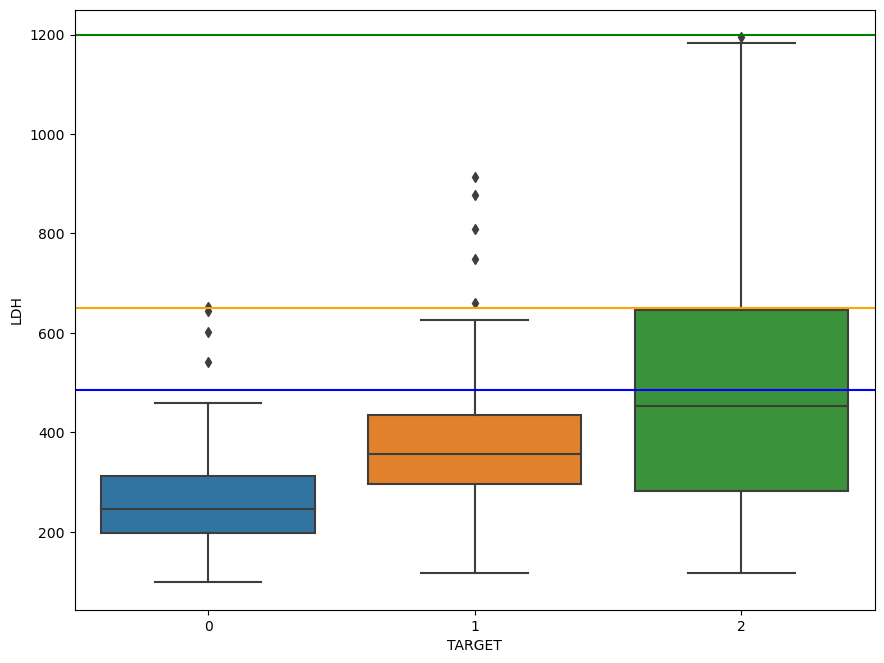

In [20]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0,0,1,1])

sns.boxplot(ax=ax, data=df, x='TARGET', y='LDH')

ax.axhline(y=485.75, color='b')

ax.axhline(y=650, color = 'orange')

ax.axhline(y=1200, color='g')

## OUTLIERS Function

In [21]:
def outliers(df, Target, feature, T):
    
    q1 = df[df[Target]==T][feature].quantile(0.25)
    
    q3 = df[df[Target]==T][feature].quantile(0.75)
    
    iqr = q3 - q1
    
    ub = (q3+(1.5*iqr))
    
#     lb = (q1-(1.5*iqr))
    return ub

In [22]:
def upperb(df, Target, feature):
    ubs=[]
    
    for T in range(len(df[Target].unique())):
        ubs.append(outliers(df, Target, feature, T))
    
    return ubs

In [23]:
def boxplot(df, Target, feature):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_axes([0,0,1,1])

    sns.boxplot(ax=ax, data=df, x=Target, y=feature)
    
    y = upperb(df, Target, feature)

    ax.axhline(y=y[0], color='b')

    ax.axhline(y=y[1], color = 'orange')

    ax.axhline(y=y[2], color='g')

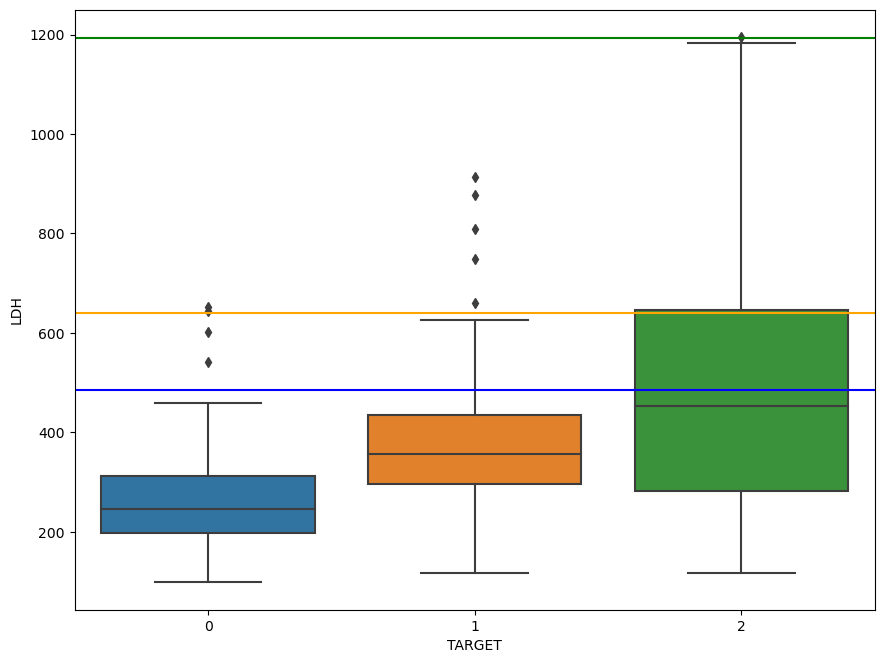

In [24]:
boxplot(df, "TARGET", "LDH")

In [25]:
def drop_outliers(df, Target, feature):
    ubs=[]
    
    ubs= upperb(df, Target, feature)
    
    for T in range(len(df[Target].unique())):
        df = df.drop(index= df[df[Target]==T][feature][df[feature]>ubs[T]].index,
                    axis=0)
    return df

## LDH

In [26]:
df = drop_outliers(df, "TARGET", "LDH")

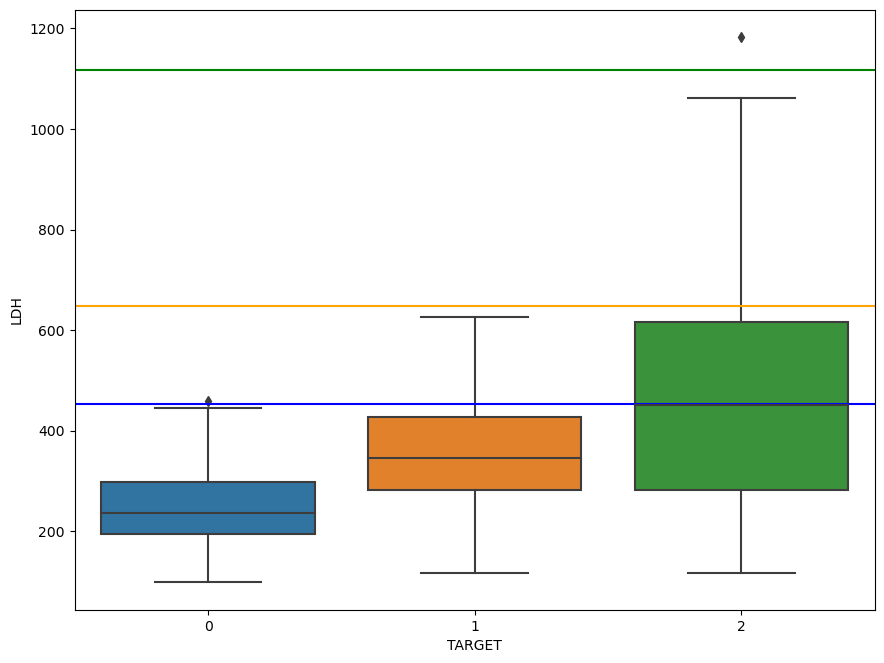

In [27]:
boxplot(df, "TARGET", "LDH")

## PCR

In [28]:
df = drop_outliers(df, "TARGET", "PCR")

## AST

In [29]:
df = drop_outliers(df, "TARGET", "AST")

## ALT

In [30]:
df = drop_outliers(df, "TARGET", "ALT")

## Linfociti

In [31]:
df = drop_outliers(df, "TARGET", "Linfociti")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 278
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     210 non-null    object 
 1   date        210 non-null    object 
 2   SESSO       210 non-null    object 
 3   AGE         210 non-null    int64  
 4   WBC         208 non-null    float64
 5   Piastrine   208 non-null    float64
 6   Neutrofili  151 non-null    float64
 7   Linfociti   151 non-null    float64
 8   Monociti    151 non-null    float64
 9   Eosinofili  152 non-null    float64
 10  Basofili    151 non-null    float64
 11  PCR         204 non-null    float64
 12  AST         208 non-null    float64
 13  ALT         201 non-null    float64
 14  ALP         95 non-null     float64
 15  GGT         100 non-null    float64
 16  LDH         142 non-null    float64
 17  TARGET      210 non-null    int64  
dtypes: float64(13), int64(2), object(3)
memory usage: 31.2+ KB


# 4. Handling Missing Values

## Fill/Keep/Drop?

In [33]:
df.head()

,Country,date,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,Canada,3/2/07,M,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,2
1,USA,3/22/07,M,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,2
2,Austria,4/6/07,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,2
3,Pakistan,4/14/07,M,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,2
4,germany,4/15/07,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


## A. How Much Data is Missing?

In [34]:
df.isnull().sum()

Country         0
date            0
SESSO           0
AGE             0
WBC             2
Piastrine       2
Neutrofili     59
Linfociti      59
Monociti       59
Eosinofili     58
Basofili       59
PCR             6
AST             2
ALT             9
ALP           115
GGT           110
LDH            68
TARGET          0
dtype: int64

### Make a Function to calculate the percent of missing data in each columns (feature) and then sort it

In [35]:
def missing_per(df):
    nan_per = 100*(df.isnull().sum()/len(df))
    
    nan_per = nan_per[nan_per>0].sort_values()
    
    return nan_per

In [36]:
nan_per = missing_per(df)

In [37]:
nan_per

WBC            0.952381
Piastrine      0.952381
AST            0.952381
PCR            2.857143
ALT            4.285714
Eosinofili    27.619048
Neutrofili    28.095238
Linfociti     28.095238
Monociti      28.095238
Basofili      28.095238
LDH           32.380952
GGT           52.380952
ALP           54.761905
dtype: float64

### Plot the feature with missing indicating the percent of missing data:

In [38]:
def plot(df):
    nan_per = missing_per(df)
    
    plt.figure(figsize=(12, 6))
    
    sns.barplot(x=nan_per.index, y=nan_per)

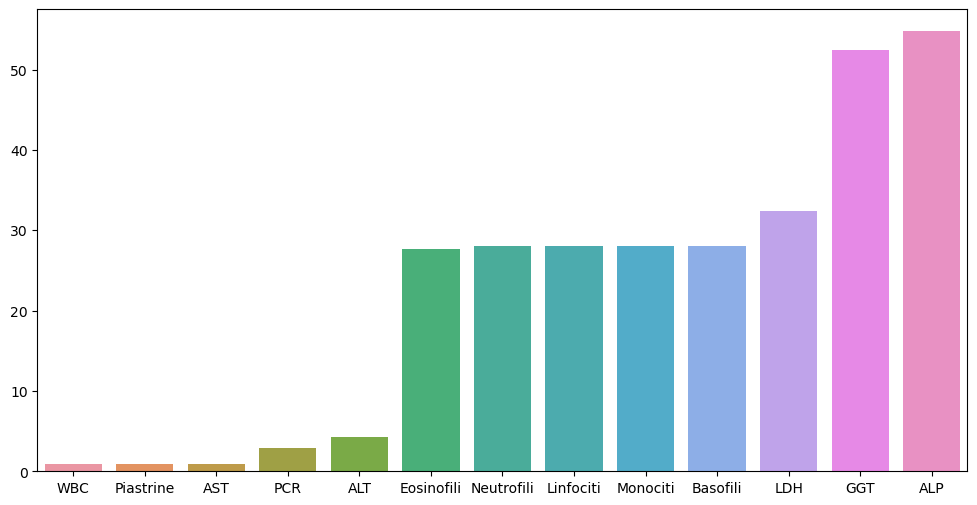

In [39]:
plot(df)

## B. Working base on Rows Missing Data

**If only a few rows are missing some values, then it might just be a good idea to drop those rows.** 

**What does this cost you in terms of performace? It essentialy removes potential training/testing data, but if its only a few rows, its unlikely to change performance.**

**Every Feature with missing data must be checked!**

**We choose a threshold of 1%. It means, if there is less than 1% of a feature are missing,then we will consider just dropping that rows**

In [40]:
nan_per[nan_per<1]

WBC          0.952381
Piastrine    0.952381
AST          0.952381
dtype: float64

In [41]:
df[df['WBC'].isnull()]

,Country,date,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
40,Austria,9/22/07,M,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
69,Norway,12/19/07,M,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.8,27.0,39.0,NaN,NaN,321.0,2


In [42]:
df[df['AST'].isnull()]

,Country,date,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
4,germany,4/15/07,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
40,Austria,9/22/07,M,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [43]:
df[df['Piastrine'].isnull()]

,Country,date,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
40,Austria,9/22/07,M,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
69,Norway,12/19/07,M,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.8,27.0,39.0,NaN,NaN,321.0,2


### Dropping Rows:

In [44]:
df= df.dropna(axis=0, subset=['WBC', 'Piastrine', 'AST'])

In [45]:
missing_per(df)

PCR            1.932367
ALT            3.381643
Eosinofili    26.570048
Neutrofili    27.053140
Linfociti     27.053140
Monociti      27.053140
Basofili      27.053140
LDH           31.884058
GGT           51.690821
ALP           54.106280
dtype: float64

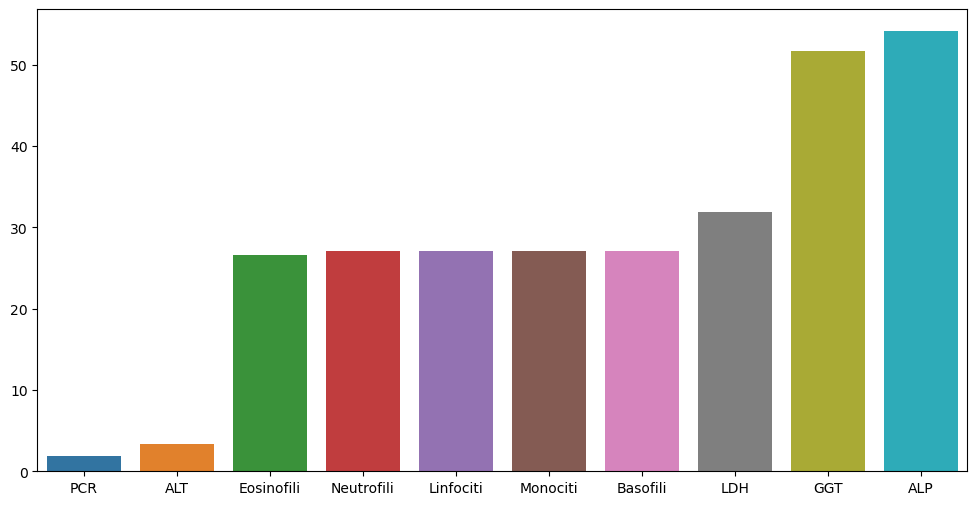

In [46]:
plot(df)

## Filling the missing values:

## C. Working based on Columns Missing Data

In [47]:
nan_per = missing_per(df)
nan_per[nan_per<10]

PCR    1.932367
ALT    3.381643
dtype: float64

In [48]:
df['PCR'] = df['PCR'].fillna(df['PCR'].mean())

In [49]:
df['ALT'] = df['ALT'].fillna(df['ALT'].mean())

In [50]:
missing_per(df)

Eosinofili    26.570048
Neutrofili    27.053140
Linfociti     27.053140
Monociti      27.053140
Basofili      27.053140
LDH           31.884058
GGT           51.690821
ALP           54.106280
dtype: float64

## Remove the Columns with more than 50% missing values

### GGT

In [51]:
df = df.drop('GGT', axis=1)

### ALP

In [52]:
df = df.drop('ALP', axis=1)

In [53]:
missing_per(df)

Eosinofili    26.570048
Neutrofili    27.053140
Linfociti     27.053140
Monociti      27.053140
Basofili      27.053140
LDH           31.884058
dtype: float64

### PLOT

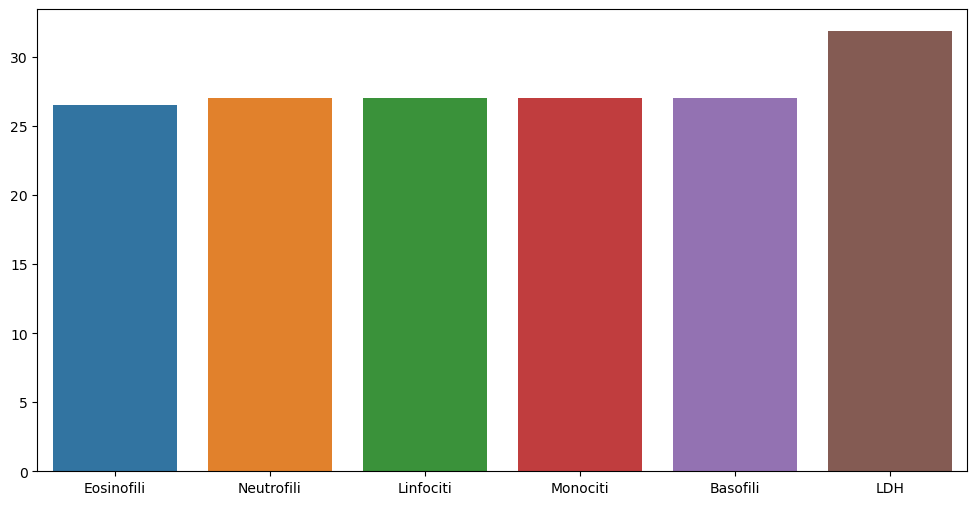

In [54]:
plot(df)

## D. Imputation of Missing Data

## What are the Stages of Life?

- Infant = 0-1 year.
- Toddler = 2-4 yrs.
- Child = 5-12 yrs.
- Teen = 13-19 yrs.
- Adult = 20-39 yrs.
- Middle Age Adult = 40-59 yrs.
- Senior Adult = 60+

In [55]:
np.sort(df['AGE'].unique())

array([ 0, 18, 23, 25, 26, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 40, 41,
       42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
       60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77,
       79, 80, 81, 82, 84, 85, 86, 87, 89, 90, 91, 93, 94, 95],
      dtype=int64)

In [56]:
def ageGroup(age):
    
    if(age>=0 and age<=19):
        return 'Teen'
    
    elif(age>19 and age<=39):
        return 'Adult'
    
    elif(age>39 and age<=59):
        return 'Middle Age Adult'
    
    elif(age>=60):
        return 'Senior Adult'

In [57]:
df['AgeGroups'] = df['AGE'].apply(ageGroup)

In [58]:
df['AgeGroups']

0      Middle Age Adult
1      Middle Age Adult
2          Senior Adult
3          Senior Adult
5          Senior Adult
             ...       
274    Middle Age Adult
275               Adult
276    Middle Age Adult
277    Middle Age Adult
278    Middle Age Adult
Name: AgeGroups, Length: 207, dtype: object

### Eosinofili

In [59]:
df['Eosinofili'] = df.groupby('AgeGroups')['Eosinofili'].transform(lambda x: x.fillna(x.mean()))

In [60]:
missing_per(df)

Neutrofili    27.053140
Linfociti     27.053140
Monociti      27.053140
Basofili      27.053140
LDH           31.884058
dtype: float64

### Neutrofili

In [61]:
df['Neutrofili'] = df['Neutrofili'].fillna(df['Neutrofili'].mean())

In [62]:
missing_per(df)

Linfociti    27.053140
Monociti     27.053140
Basofili     27.053140
LDH          31.884058
dtype: float64

### Linfociti

In [63]:
male = df[df['SESSO']=='M']

female = df[df['SESSO']=='F']

In [64]:
male['Linfociti'] = male.groupby(by='AgeGroups')['Linfociti'].transform(lambda x: x.fillna(x.mean()))

C:\Users\amini\AppData\Local\Temp\ipykernel_18188\641595925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male['Linfociti'] = male.groupby(by='AgeGroups')['Linfociti'].transform(lambda x: x.fillna(x.mean()))


In [65]:
female['Linfociti'] = female.groupby(by='AgeGroups')['Linfociti'].transform(lambda x: x.fillna(x.mean()))

C:\Users\amini\AppData\Local\Temp\ipykernel_18188\1603174101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female['Linfociti'] = female.groupby(by='AgeGroups')['Linfociti'].transform(lambda x: x.fillna(x.mean()))


In [66]:
df = pd.concat([male, female], axis=0)

In [67]:
missing_per(df)

Linfociti     0.483092
Monociti     27.053140
Basofili     27.053140
LDH          31.884058
dtype: float64

In [68]:
df[df['Linfociti'].isnull()==True]

,Country,date,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,LDH,TARGET,AgeGroups
202,Italy,7/31/09,F,18,9.2,311.0,5.913907,NaN,NaN,0.0,NaN,0.1,24.0,27.0,142.0,0,Teen


In [69]:
df['Linfociti'] = df['Linfociti'].fillna(df['Linfociti'].mean())

In [70]:
missing_per(df)

Monociti    27.053140
Basofili    27.053140
LDH         31.884058
dtype: float64

### Monociti

In [71]:
df['Monociti'] = df['Monociti'].fillna(df['Monociti'].mean())

In [72]:
missing_per(df)

Basofili    27.053140
LDH         31.884058
dtype: float64

### Basofili

In [73]:
df['Basofili'] = df['Basofili'].fillna(df['Basofili'].mean())

In [74]:
missing_per(df)

LDH    31.884058
dtype: float64

### LDH

In [75]:
df['LDH'] = df.groupby(by='AgeGroups')['LDH'].transform(lambda x: x.fillna(x.mean()))

# 5. Now, we don't have any Missing Data

In [76]:
missing_per(df)

Series([], dtype: float64)

# 6.Save Dataset

In [77]:
#save

df.to_csv('COVID19_new.csv')

## Finished


